In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 初步检测arm和odm的输出

In [4]:
epoch_loss = np.load('./weights/cf_refinedet_20230417/epochloss_array128_cf02_8000.npy')
epoch_loss.shape

(85, 5)

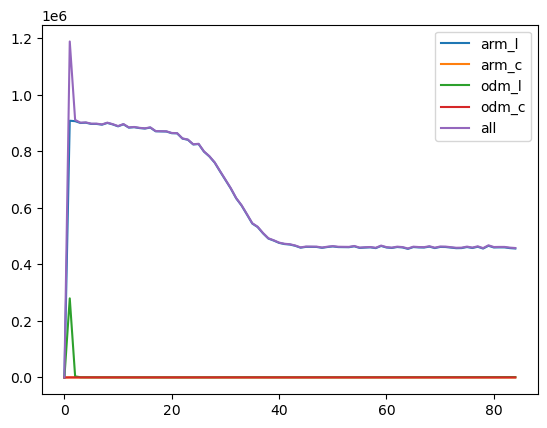

In [7]:
plt.plot(np.arange(85),epoch_loss,label=['arm_l','arm_c','odm_l','odm_c','all'])
plt.legend()

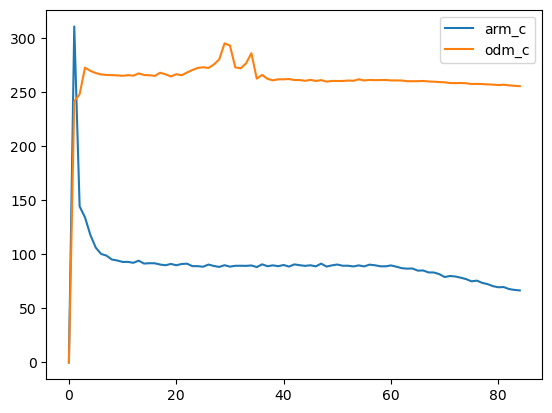

In [10]:
plt.plot(np.arange(85),epoch_loss[:,[1,3]],label=['arm_c','odm_c'])
plt.legend()

In [11]:
from models.refinedet import build_refinedet

build_refinedet('train', 128, 2)

RefineDet(
  (vgg): ModuleList(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=

In [1]:
import torch
from matplotlib import pyplot as plt

conf_t_arm = torch.load('./check/conf_t_arm.pt')
conf_t_odm = torch.load('./check/conf_t_odm.pt')

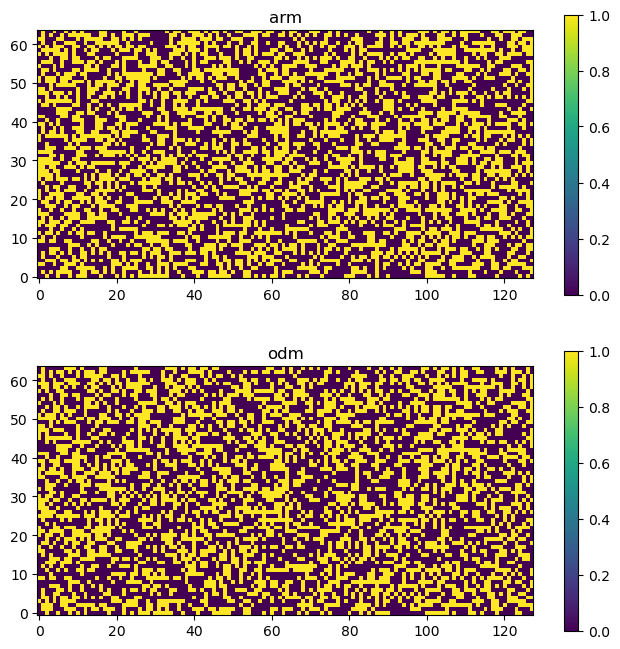

In [2]:
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.title('arm')
plt.imshow(conf_t_arm[:,:128],origin='lower')
plt.colorbar()
plt.subplot(212)
plt.title('odm')
plt.imshow(conf_t_odm[:,:128],origin='lower')
plt.colorbar()

In [4]:
conf_t_odm

tensor([[0, 0, 1,  ..., 0, 0, 0],
        [0, 1, 1,  ..., 0, 0, 0],
        [0, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 0,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0]])

In [30]:
truth = torch.load('check/targets.pt')
l = 1200
for i in truth:
    l = min(l,len(i))
l

958

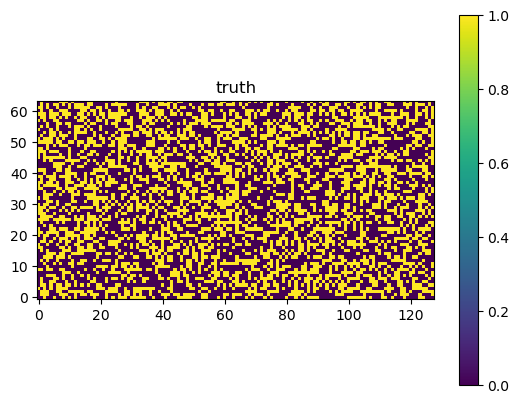

In [38]:
truth_label = torch.tensor([])
for i in truth:
    truth_label = torch.concat((truth_label, i[:,-1][:l]))
truth_label = truth_label.view(64,l)
plt.title('truth')
plt.imshow(conf_t_odm[:,:128],origin='lower')
plt.colorbar()

In [44]:
import numpy as np
cat = np.load('data/cf02/catalog/cat_0_708.npy')
cat[:,-1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [40]:
arm_loc_data, arm_conf_data, odm_loc_data, odm_conf_data, priors = torch.load('check/predictions.pt')


In [41]:
conf_prediction = torch.load('./check/conf_prediction_arm.pt')
conf_prediction.shape

torch.Size([7192, 2])

In [52]:
overlaps = torch.load('./check/overlaps.pt')
overlaps.shape

torch.Size([1105, 21824])

In [53]:
overlaps

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0081, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0080, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0387, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0076, 0.0000, 0.0078],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])

In [44]:
target = torch.load('./check/targets.pt')
truth = target[63][:,:-1].data
truths_labels = target[63][:,-1].data


In [45]:
truth

tensor([[121.5000,  38.8750, 127.4375,  44.8125],
        [ 13.6406,  12.7500,  19.6875,  18.7969],
        [ 53.3750,  33.7188,  59.5312,  39.8438],
        ...,
        [103.4375,  91.5000, 110.0000,  98.0625],
        [  7.2617, 120.6875,  13.2031, 126.6250],
        [ 32.1875, 114.8125,  38.1875, 120.8125]], dtype=torch.float16)

In [46]:
priors

tensor([[128.0000, 128.0000, 128.0000, 128.0000],
        [128.0000, 128.0000, 128.0000, 128.0000],
        [128.0000, 128.0000, 128.0000, 128.0000],
        ...,
        [112.0093,   5.4648,  64.0000,  64.0000],
        [ 65.5855, 108.3050,  64.0000,  64.0000],
        [ 70.4382,   1.0963,  64.0000,  64.0000]])

In [107]:
(truth[:,2:]-truth[:,:2]).max(0)

torch.return_types.max(
values=tensor([44.4375, 44.4688], dtype=torch.float16),
indices=tensor([659, 659]))

In [111]:
8*8

64

#### 编码公式
encode:

$xc_{g} = \frac{xc_{match}-xc_{priors}}{variance_0*w_{priors}}$\
$w_g = \log_e{(\frac{xmax_{match}-xmin_{match}}{w_{priors}}+10^{-5})}/variance_1$

decode:

$xc_{boxes} = xc_{encode}*variance_0*w_{priors} + xc_{priors}$\
$w_{boxes} = e^{w_{encode}*variance_1}*w_{priors}$

# 检测预测框

In [1]:
from models.refinedet import build_refinedet
from layers.box_utils import *
from data.config import *
import numpy as np
import torch

net = build_refinedet('train',128,cf_refinedet['128']['num_classes'])

/home/ubuntu/anaconda3/envs/torch/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1678402411778/work/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [2]:
net.load_weights('/data/_hyz/RefineDet/weights/cf_refinedet_20230509t/RefineDet128_dsAnt_v1_eph159_itr15000.final.pth')
img = np.load('dataset/Ant_v1/image/img_590_3068.npy').astype(np.float32)
img = torch.tensor(img).repeat(1,3,1,1)
out = net(img)
arm_loc, arm_conf, odm_loc, odm_conf, prior = out
odm_boxes = decode(odm_loc[0],prior,cf_refinedet['128']['variance'])
out_kind = odm_conf[0].max(1)

Loading weights into state dict...
Finished!


In [3]:
odm_boxes_cs = torch.concat([(odm_boxes[:,2:]+odm_boxes[:,:2])/2,(odm_boxes[:,2:]-odm_boxes[:,:2])],dim=1)
odm_boxes, odm_boxes_cs

(tensor([[ -0.5673,  -0.5281,   2.4469,   2.5460],
         [ -0.6119,   1.4668,   2.4066,   4.5389],
         [ -0.5499,   3.4875,   2.4524,   6.5669],
         ...,
         [107.7919,  72.1313, 138.9110, 105.2464],
         [106.4075,  88.1898, 136.5773, 121.6929],
         [103.2332, 101.2629, 137.2978, 133.8223]], grad_fn=<CopySlices>),
 tensor([[  0.9398,   1.0089,   3.0142,   3.0741],
         [  0.8973,   3.0029,   3.0185,   3.0721],
         [  0.9513,   5.0272,   3.0023,   3.0794],
         ...,
         [123.3514,  88.6889,  31.1191,  33.1151],
         [121.4924, 104.9414,  30.1698,  33.5031],
         [120.2655, 117.5426,  34.0646,  32.5594]], grad_fn=<CatBackward0>))

In [4]:
out_kind.values[out_kind.indices.gt(0)]

tensor([], grad_fn=<IndexBackward0>)

In [5]:
out_kind.indices.gt(0),out_kind.indices.lt(1)

(tensor([False, False, False,  ..., False, False, False]),
 tensor([True, True, True,  ..., True, True, True]))

In [6]:
with open('dataset/Ant_v1/anno/pred_590_3068_0509t_itr15000_odm.reg','w') as p:
    p.write('global color=blue dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \nphysical \n')
    for i,_i in enumerate(out_kind.indices.lt(1)):
        if _i:
            p.write(f'box({odm_boxes_cs[i,0].item()},{odm_boxes_cs[i,1].item()},{odm_boxes_cs[i,2].item()},{odm_boxes_cs[i,3].item()},0) \t' +\
                        '# text = {%.2f}\n'%out_kind.values[i].item())
    p.write('global color=red dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \nphysical \n')
    for i,_i in enumerate(out_kind.indices.gt(0)):
        if _i:
            p.write(f'box({odm_boxes_cs[i,0].item()},{odm_boxes_cs[i,1].item()},{odm_boxes_cs[i,2].item()},{odm_boxes_cs[i,3].item()},0) \t' +\
                    '# text = {%.2f}\n'%out_kind.values[i].item())


In [7]:
arm_boxes = decode(arm_loc[0],prior,cf_refinedet['128']['variance'])
arm_kind = arm_conf[0].max(1)
arm_boxes_cs = torch.concat([(arm_boxes[:,2:]+arm_boxes[:,:2])/2,(arm_boxes[:,2:]-arm_boxes[:,:2])],dim=1)

In [8]:
with open('dataset/Ant_v1/anno/pred_590_3068_0509t_itr15000_arm.reg','w') as p:
    p.write('global color=blue dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \nphysical \n')
    for i,_i in enumerate(arm_kind.indices.lt(1)):
        if _i:
            p.write(f'box({arm_boxes_cs[i,0].item()},{arm_boxes_cs[i,1].item()},{arm_boxes_cs[i,2].item()},{arm_boxes_cs[i,3].item()},0) \t' +\
                        '# text = {%.2f}\n'%arm_kind.values[i].item())
    p.write('global color=red dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \nphysical \n')
    for i,_i in enumerate(arm_kind.indices.gt(0)):
        if _i:
            p.write(f'box({arm_boxes_cs[i,0].item()},{arm_boxes_cs[i,1].item()},{arm_boxes_cs[i,2].item()},{arm_boxes_cs[i,3].item()},0) \t' +\
                    '# text = {%.2f}\n'%arm_kind.values[i].item())


In [21]:

prior_sizes

tensor([ 3., 10., 26., 34.])

In [9]:
prior_sizes = prior[:,2].unique()
with open('dataset/Ant_v1/anno/pred_590_3068_0509t_itr15000_prior.reg','w') as p:
    p.write('global color=#FF0064 dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \nphysical \n')
    for i,_i in enumerate(prior[:,2]):
        if _i == prior_sizes[0]:
            p.write(f'circle({prior[i,0].item()},{prior[i,1].item()},{prior[i,2].item()/2}) \n')
    p.write('global color=#A0A096 dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \nphysical \n')
    for i,_i in enumerate(prior[:,2]):
        if _i == prior_sizes[1]:
            p.write(f'circle({prior[i,0].item()},{prior[i,1].item()},{prior[i,2].item()/2}) \n')
    p.write('global color=#A0A0C8 dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \nphysical \n')
    for i,_i in enumerate(prior[:,2]):
        if _i == prior_sizes[2]:
            p.write(f'circle({prior[i,0].item()},{prior[i,1].item()},{prior[i,2].item()/2}) \n')
    p.write('global color=#A0A0FA dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \nphysical \n')
    for i,_i in enumerate(prior[:,2]):
        if _i == prior_sizes[3]:
            p.write(f'circle({prior[i,0].item()},{prior[i,1].item()},{prior[i,2].item()/2}) \n')
    


In [24]:
n = 250
n//16,n%16

(15, 10)

检测结果画框一体化

In [171]:
from models.refinedet import build_refinedet
from layers.box_utils import *
from data.config import *
import numpy as np
import torch

pathes = {
    'weight': '/data/_hyz/RefineDet/weights/cf_refinedet_20230510t/RefineDet128_dscf_s_v0_eph157_itr15000.final.pth',
    'dataroot': '/data/_hyz/RefineDet/dataset/cf_s_v0/',
}

fileid_list = list()
for i in os.listdir(pathes['dataroot']+'anno'):
    if i.endswith('fits'):
        fileid_list.append(i[:-5].split('anno_')[1])
date_stamp = pathes['weight'].split('cf_refinedet_')[1].split('/RefineDet128_ds')[0]
eph_stamp = pathes['weight'].split('eph')[1].split('_itr')[0]


net = build_refinedet('train',128,cf_refinedet['128']['num_classes'])

net.load_weights(pathes['weight'])

for testid in fileid_list:
    img = np.load(pathes['dataroot']+'/image/img_'+testid+'.npy').astype(np.float32)
    img = torch.tensor(img).repeat(1,3,1,1)
    out = net(img)
    arm_loc, arm_conf, odm_loc, odm_conf, prior = out

    odm_boxes = decode(odm_loc[0],prior,cf_refinedet['128']['variance'])
    odm_kind = odm_conf[0].max(1)
    odm_boxes_cs = torch.concat([(odm_boxes[:,2:]+odm_boxes[:,:2])/2,(odm_boxes[:,2:]-odm_boxes[:,:2])],dim=1)

    arm_boxes = decode(arm_loc[0],prior,cf_refinedet['128']['variance'])
    arm_kind = arm_conf[0].max(1)
    arm_boxes_cs = torch.concat([(arm_boxes[:,2:]+arm_boxes[:,:2])/2,(arm_boxes[:,2:]-arm_boxes[:,:2])],dim=1)

    prior_sizes = prior[:,2].unique()
    
    with open(pathes['dataroot']+'anno/pred_'+testid+'_'+date_stamp+'_eph'+eph_stamp+'_odm.reg','w') as p:
        p.write('global color=cyan dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \nphysical \n')
        for i,_i in enumerate(odm_kind.indices.lt(1)):
            if _i:
                p.write(f'box({odm_boxes_cs[i,0].item()},{odm_boxes_cs[i,1].item()},{odm_boxes_cs[i,2].item()},{odm_boxes_cs[i,3].item()},0) \t' +\
                            '# text = {%.2f}\n'%odm_kind.values[i].item())
        p.write('global color=red dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \nphysical \n')
        for i,_i in enumerate(odm_kind.indices.gt(0)):
            if _i:
                p.write(f'box({odm_boxes_cs[i,0].item()},{odm_boxes_cs[i,1].item()},{odm_boxes_cs[i,2].item()},{odm_boxes_cs[i,3].item()},0) \t' +\
                        '# text = {%.2f}\n'%odm_kind.values[i].item())
                
    with open(pathes['dataroot']+'anno/pred_'+testid+'_'+date_stamp+'_eph'+eph_stamp+'_odm.reg','w') as p:
        p.write('global color=cyan dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \nphysical \n')
        for i,_i in enumerate(arm_kind.indices.lt(1)):
            if _i:
                p.write(f'box({arm_boxes_cs[i,0].item()},{arm_boxes_cs[i,1].item()},{arm_boxes_cs[i,2].item()},{arm_boxes_cs[i,3].item()},0) \t' +\
                            '# text = {%.2f}\n'%arm_kind.values[i].item())
        p.write('global color=red dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \nphysical \n')
        for i,_i in enumerate(arm_kind.indices.gt(0)):
            if _i:
                p.write(f'box({arm_boxes_cs[i,0].item()},{arm_boxes_cs[i,1].item()},{arm_boxes_cs[i,2].item()},{arm_boxes_cs[i,3].item()},0) \t' +\
                        '# text = {%.2f}\n'%arm_kind.values[i].item())

                
with open(pathes['dataroot']+'anno/pred_'+date_stamp+'_prior.reg','w') as p:
    p.write('global color=#FF0064 dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \nphysical \n')
    for i,_i in enumerate(prior[:,2]):
        if _i == prior_sizes[0]:
            p.write(f'circle({prior[i,0].item()},{prior[i,1].item()},{prior[i,2].item()/2}) \n')
    p.write('global color=#A0A096 dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \nphysical \n')
    for i,_i in enumerate(prior[:,2]):
        if _i == prior_sizes[1]:
            p.write(f'circle({prior[i,0].item()},{prior[i,1].item()},{prior[i,2].item()/2}) \n')
    p.write('global color=#A0A0C8 dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \nphysical \n')
    for i,_i in enumerate(prior[:,2]):
        if _i == prior_sizes[2]:
            p.write(f'circle({prior[i,0].item()},{prior[i,1].item()},{prior[i,2].item()/2}) \n')
    p.write('global color=#A0A0FA dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \nphysical \n')
    for i,_i in enumerate(prior[:,2]):
        if _i == prior_sizes[3]:
            p.write(f'circle({prior[i,0].item()},{prior[i,1].item()},{prior[i,2].item()/2}) \n')

Loading weights into state dict...
Finished!


# 检测匹配框

#### 参数定义，网络搭建，正向传播

In [4]:
from models.refinedet import build_refinedet
from layers.box_utils import *
from layers.modules import RefineDetMultiBoxLoss
from data import cargs
from data import HOME
from data import cf_refinedet as cfg
import numpy as np
import torch
import os
import torch.nn.functional as F
import matplotlib.pyplot as plt

pathes = {
    'weight': '/data/_hyz/RefineDet/weights/cf_refinedet_20230510t/RefineDet128_dscf_s_v0_eph157_itr15000.final.pth',
    'dataroot': '/data/_hyz/RefineDet/dataset/cf_s_v0/',
}


In [5]:

fileid_list = list()
for i in os.listdir(pathes['dataroot']+'anno'):
    if i.endswith('fits'):
        fileid_list.append(i[:-5].split('anno_')[1])
date_stamp = pathes['weight'].split('cf_refinedet_')[1].split('/RefineDet128_ds')[0]
eph_stamp = pathes['weight'].split('eph')[1].split('_itr')[0]


net = build_refinedet('train',128,cfg['128']['num_classes'])

net.load_weights(pathes['weight'])

# for idx in fileid_list:
testid = fileid_list[0]
print('testid: ',testid)
img = np.load(pathes['dataroot']+'/image/img_'+testid+'.npy').astype(np.float32)
img = torch.tensor(img).repeat(1,3,1,1)
targets = np.load(pathes['dataroot']+'/catalog/cat_'+testid+'.npy').astype(np.float16)
targets = torch.tensor(targets).repeat(1,1,1)
out = net(img)
arm_loc, arm_conf, odm_loc, odm_conf, prior = out
out = (arm_loc, arm_conf, odm_loc, odm_conf, prior)

# arm_criterion = RefineDetMultiBoxLoss(2, args.input_size, 0.5, True, 0, True, 3, 0.5,
#                              False, args.cuda)
# odm_criterion = RefineDetMultiBoxLoss(cfg['128']['num_classes'], args.input_size, 0.5, True, 0, True, 3, 0.5,
#                             False, args.cuda, is_ODM=True)

# arm_loss_l, arm_loss_c = arm_criterion(out, targets)
# odm_loss_l, odm_loss_c = odm_criterion(out, targets)

/home/ubuntu/anaconda3/envs/torch/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1678402411778/work/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Loading weights into state dict...
Finished!
testid:  6490_6962


#### loss计算过程参数定义

In [6]:
class Args_loss(object):
    def __init__(self):
        self.use_gpu = False
        self.num_classes = 2
        self.threshold = 0.1
        self.background_label = 0
        self.do_neg_mining = True
        self.negpos_ratio = 3
        self.variance = cfg['128']['variance']
        self.conf_thld = 2
        self.is_ODM = False
        
argsloss = Args_loss()

#### loss过程传入data

In [7]:
arm_loc_data, arm_conf_data, odm_loc_data, odm_conf_data, priors = out

# initialize
if argsloss.is_ODM:
    loc_data, conf_data = odm_loc_data, odm_conf_data
else:
    loc_data, conf_data = arm_loc_data, arm_conf_data


In [8]:
num = loc_data.size(0)  # batch
priors = priors[:loc_data.size(1), :]  # choose prior boxes in num of prediction boxes
num_priors = (priors.size(0))  # in fact this is prior boxes after choose
num_classes = argsloss.num_classes
print(num, loc_data.size(), conf_data.size(), priors.size())


1 torch.Size([1, 5440, 4]) torch.Size([1, 5440, 2]) torch.Size([5440, 4])


In [9]:
from layers.box_utils import *
import matplotlib.transforms as mtransforms
from matplotlib.ticker import MultipleLocator
# match priors (default boxes) and ground truth boxes
loc_t = torch.Tensor(num, num_priors, 4)
conf_t = torch.LongTensor(num, num_priors)
truths_loc = targets[0][:, :-1].data
truths_labels = targets[0][:, -1].data
truths_labels

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.], dtype=torch.float16)

#### 计算overlap并imshow

cpu cpu


tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0589, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])

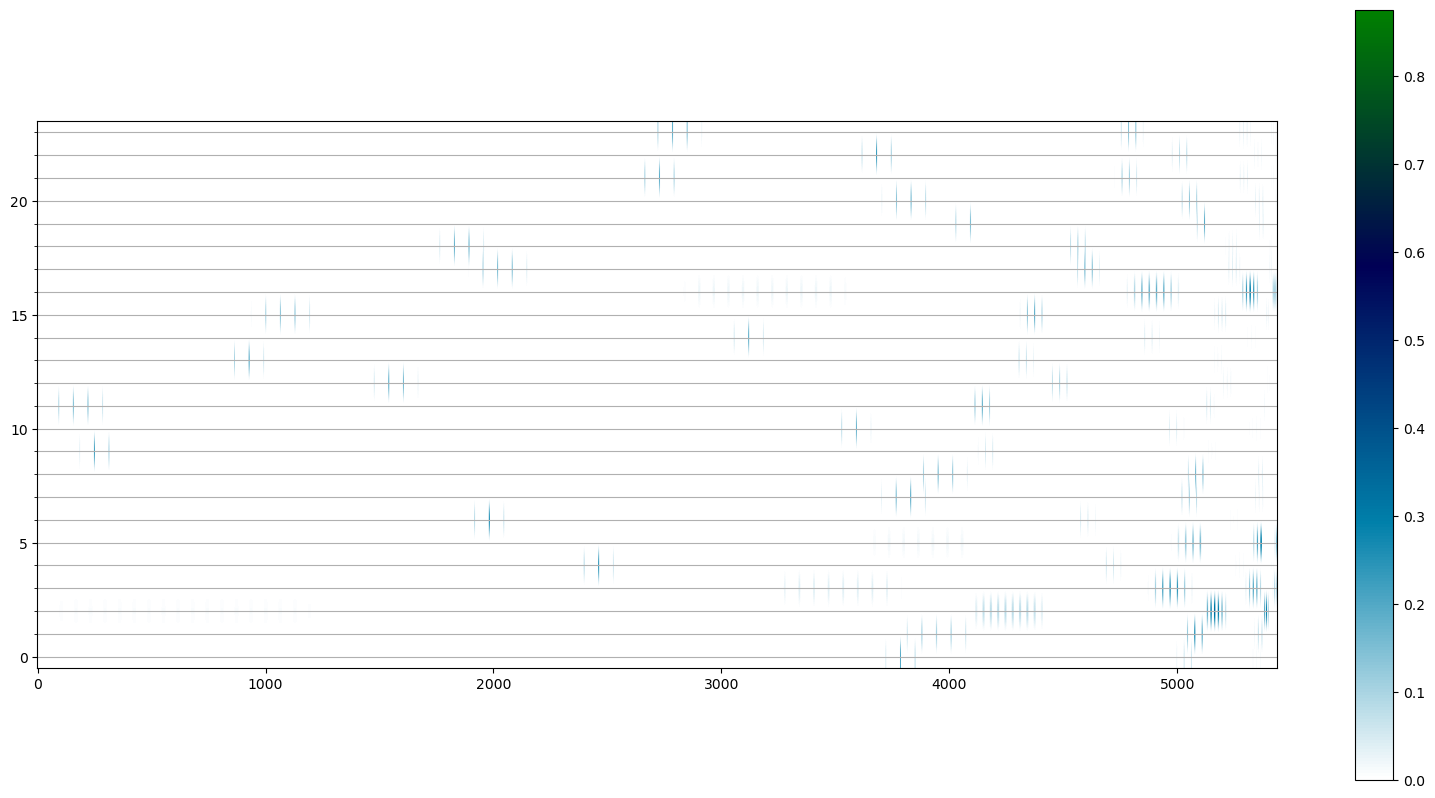

In [10]:
if not argsloss.is_ODM:
    truths_labels = truths_labels >= 0
    defaults = priors.data
    overlaps = jaccard(truths_loc, point_form(priors))

fig, ax = plt.subplots(figsize=(20,10))
plt.imshow(overlaps,origin='lower',aspect=100,cmap='ocean_r')
# ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(1))
plt.grid(which='both',axis='y')
plt.colorbar()
overlaps

In [8]:
overlaps.gt(0), overlaps.gt(0).sum(dim=0), overlaps[:,overlaps.gt(0).sum(dim=0).gt(0)].shape

(tensor([[False, False, False,  ..., False, False, False],
         [False, False, False,  ...,  True, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]),
 tensor([0, 0, 0,  ..., 2, 4, 3]),
 torch.Size([24, 1534]))

#### 只选定有重叠的prior

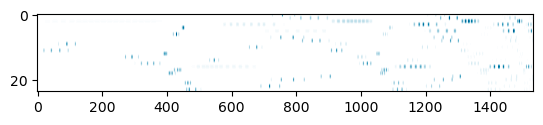

In [11]:
overlapindex = overlaps.gt(0).sum(dim=0).gt(0)
overlaped = overlaps[:,overlapindex]
prior_overlaped = prior[overlapindex,:]
plt.imshow(overlaped,cmap='ocean_r',aspect=10)

#### 将有重叠的prior写为reg

In [10]:
with open(pathes['dataroot']+'/anno/overlaped_priors_%s.reg'%testid,'w') as p:
    p.write('global color=#FF0064 dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \nphysical \n')
    for i,_i in enumerate(prior[overlaps.gt(0).sum(dim=0).gt(0),:]):
        p.write(f'circle({_i[0].item()},{_i[1].item()},{_i[2].item()/2}) \n')

#### 全部prior的match计算与显示

In [20]:
# (Bipartite Matching)
# [1,num_objects] best prior for each ground truth
best_prior_overlap, best_prior_idx = overlaps.max(1, keepdim=True)
# [1,num_priors] best ground truth for each prior
best_truth_overlap, best_truth_idx = overlaps.max(0, keepdim=True)
best_truth_idx.squeeze_(0)
best_truth_overlap.squeeze_(0)
best_prior_idx.squeeze_(1)
best_prior_overlap.squeeze_(1)
# best_truth_overlap.index_fill_(0, best_prior_idx, 2)  # ensure best prior
# TODO refactor: index  best_prior_idx with long tensor
# ensure every gt matches with its prior of max overlap
# 以下三行实现功能：先对每个truth匹配最佳prior，再对剩余的prior匹配最佳truth
for j in range(best_prior_idx.size(0)):
    best_truth_idx[best_prior_idx[j]] = j
matches = truths_loc[best_truth_idx]          # Shape: [num_priors,4]


Text(0.5, 1.0, 'matches hist in x')

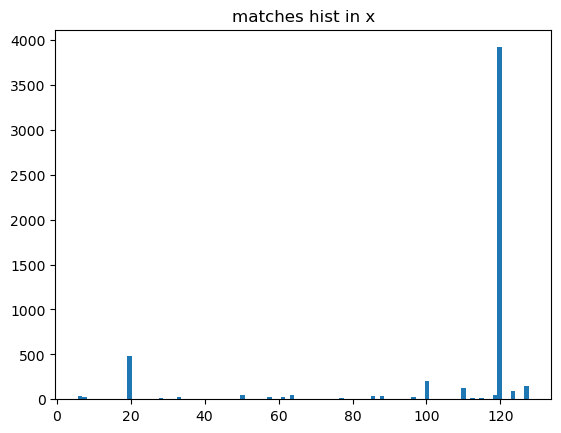

In [12]:
plt.hist((matches[:,2]+matches[:,0])/2,bins=100)
plt.title('matches hist in x')

Text(0.5, 1.0, 'x,y differ between prior and matches_truth')

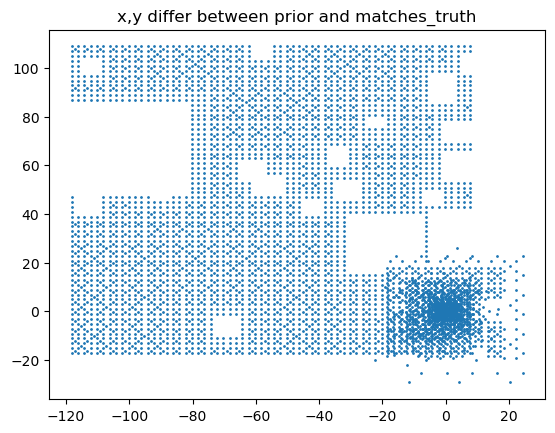

In [13]:
plt.scatter(prior[:,0]-(matches[:,2]+matches[:,0])/2, prior[:,1]-(matches[:,3]+matches[:,1])/2, s=1)
plt.title('x,y differ between prior and matches_truth')

#### overlapped的prior框的match计算与显示

In [21]:
# (Bipartite Matching)
# [1,num_objects] best prior for each ground truth
best_prior_overlaped, best_prior_idxed = overlaped.max(1, keepdim=True)
# [1,num_priors] best ground truth for each prior
best_truth_overlaped, best_truth_idxed = overlaped.max(0, keepdim=True)
best_prior_overlaped.T, best_truth_overlaped

(tensor([[0.4985, 0.6550, 0.6774, 0.4128, 0.7571, 0.6756, 0.8760, 0.4444, 0.3199,
          0.7002, 0.4898, 0.3924, 0.4435, 0.5111, 0.4506, 0.4235, 0.6928, 0.3526,
          0.3964, 0.3638, 0.3556, 0.4097, 0.6454, 0.3556]]),
 tensor([[0.0004, 0.0012, 0.0012,  ..., 0.0589, 0.0277, 0.0315]]))

In [22]:
# 调整为一维张量
best_truth_idxed.squeeze_(0)
best_truth_overlaped.squeeze_(0)
best_prior_idxed.squeeze_(1)
best_prior_overlaped.squeeze_(1)
best_truth_overlaped

tensor([0.0004, 0.0012, 0.0012,  ..., 0.0589, 0.0277, 0.0315])

In [23]:
best_truth_overlaped.index_fill_(0, best_prior_idxed, 2)  # ensure best prior


tensor([0.0004, 0.0012, 0.0012,  ..., 0.0589, 0.0277, 0.0315])

In [24]:
# TODO refactor: index  best_prior_idx with long tensor
# ensure every gt matches with its prior of max overlap
# 以下三行实现功能：先对每个truth匹配最佳prior，再对剩余的prior匹配最佳truth
for j in range(best_prior_idxed.size(0)):
    best_truth_idxed[best_prior_idxed[j]] = j
matches_overlaped = truths_loc[best_truth_idxed]          # Shape: [num_priors,4]
matches_overlaped, best_truth_idxed.shape

(tensor([[  1.9912,  67.6250,  37.3750, 103.0000],
         [  1.9912,  67.6250,  37.3750, 103.0000],
         [  1.9912,  67.6250,  37.3750, 103.0000],
         ...,
         [118.9375,  74.0000, 127.1875,  82.2500],
         [120.4375,  89.6250, 126.0625,  95.3125],
         [124.6250, 116.9375, 130.6250, 123.0000]], dtype=torch.float16),
 torch.Size([1534]))

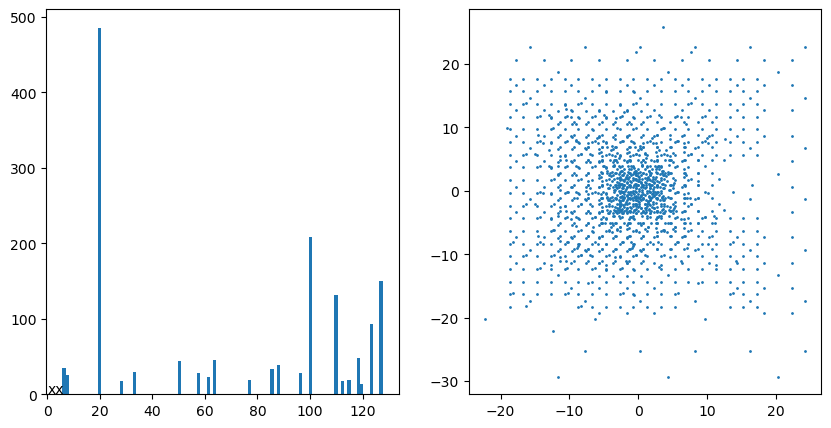

In [18]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.hist((matches_overlaped[:,2]+matches_overlaped[:,0])/2,bins=100)
ax1.text(0,1,'xx')
# ax1.title('matches hist in x')
ax2.scatter(prior_overlaped[:,0]-(matches_overlaped[:,2]+matches_overlaped[:,0])/2, prior_overlaped[:,1]-(matches_overlaped[:,3]+matches_overlaped[:,1])/2, s=1)
# ax2.title('x,y differ between prior and matches_truth')

#### 编码并写入

In [46]:
# encode and write in
mkind = truths_labels[best_truth_idx]         # Shape: [num_priors]  这是先基于面积匹配得到了框，然后直接将与匹配度最高的真值框的种类赋予。
loc = encode(matches, priors, cfg['128']['variance'])
mkind[best_truth_overlap < argsloss.threshold] = 0  # label as background
loc_t[0] = loc    # [num_priors,4] encoded offsets to learn
conf_t[0] = mkind  # [num_priors] top class label for each prior
print(loc.max(0), loc.min(0), torch.abs(loc).min(0))
loc, mkind, mkind.shape, mkind.sum()


torch.return_types.max(
values=tensor([39.4167,  6.1042,  2.4674,  2.4674]),
indices=tensor([ 0, 33, 33, 33])) torch.return_types.min(
values=tensor([ -5.7708, -36.2708,  -2.5376,  -2.5376]),
indices=tensor([1185,   63, 5422, 5422])) torch.return_types.min(
values=tensor([0.0000e+00, 0.0000e+00, 1.0014e-05, 5.2119e-03]),
indices=tensor([2727,   95,    0,    0]))


(tensor([[ 3.9417e+01,  5.7292e+00,  1.0014e-05, -5.2119e-03],
         [ 3.9417e+01,  5.0625e+00,  1.0014e-05, -5.2119e-03],
         [ 3.9417e+01,  4.3958e+00,  1.0014e-05, -5.2119e-03],
         ...,
         [ 9.0074e-02, -2.9044e-01, -1.4161e+00, -1.4161e+00],
         [ 9.5588e-02, -3.3824e-01, -1.7991e+00, -1.7880e+00],
         [ 2.2426e-01,  0.0000e+00, -1.7345e+00, -1.7242e+00]]),
 tensor([False, False, False,  ..., False, False, False]),
 torch.Size([5440]),
 tensor(351))

In [47]:
# encode and write in
mkinded = truths_labels[best_truth_idxed]         # Shape: [num_priors]  这是先基于面积匹配得到了框，然后直接将与匹配度最高的真值框的种类赋予。
loced = encode(matches_overlaped, prior_overlaped, cfg['128']['variance'])
mkinded[best_truth_overlaped < argsloss.threshold] = 0  # label as background
print(loced.max(0), loced.min(0), torch.abs(loced).min(0))
loced, mkinded, mkinded.shape, mkinded.sum()


torch.return_types.max(
values=tensor([6.2292, 6.1042, 2.4674, 2.4674]),
indices=tensor([0, 0, 0, 0])) torch.return_types.min(
values=tensor([-5.7708, -5.8958, -2.5376, -2.5376]),
indices=tensor([ 370,   18, 1517, 1517])) torch.return_types.min(
values=tensor([0.0000e+00, 0.0000e+00, 1.0014e-05, 5.2119e-03]),
indices=tensor([465,  21, 727, 727]))


(tensor([[ 6.2292,  6.1042,  2.4674,  2.4674],
         [ 6.2292,  5.4375,  2.4674,  2.4674],
         [ 6.2292,  4.7708,  2.4674,  2.4674],
         ...,
         [ 0.0901, -0.2904, -1.4161, -1.4161],
         [ 0.0956, -0.3382, -1.7991, -1.7880],
         [ 0.2243,  0.0000, -1.7345, -1.7242]]),
 tensor([False, False, False,  ..., False, False, False]),
 torch.Size([1534]),
 tensor(351))

> 这里的loc明显包含了所有truth都没匹配到的priors，这些priors都匹配到了一个边缘的框上，导致loc的xy最大偏移都到了36左右，而经过overlap检验的loced则没有这个问题

> 以下为检验best_match=2有无必要

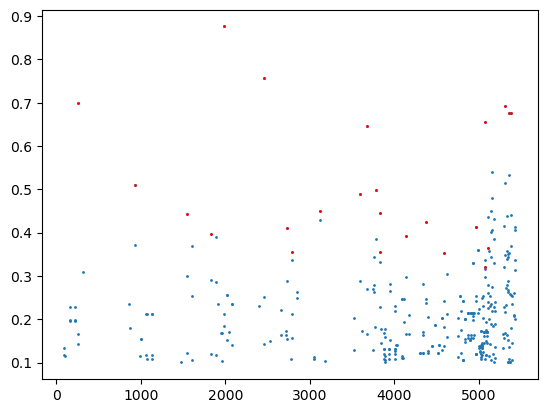

In [25]:
overlap_over = best_truth_overlap >= argsloss.threshold
plt.scatter(torch.where(overlap_over)[0], best_truth_overlap[overlap_over],s=1)
plt.scatter(best_prior_idx, best_truth_overlap[best_prior_idx],s=1,c='r')

> 匹配正值与重叠面积阈值的关系

tensor(27)

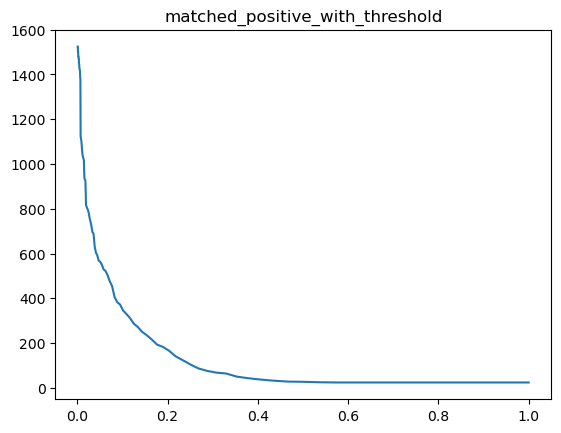

In [48]:
def matched_positive_with_threshold(threshold):
    if len(threshold) == 1:
        mkinded = truths_labels[best_truth_idxed]         # Shape: [num_priors]  这是先基于面积匹配得到了框，然后直接将与匹配度最高的真值框的种类赋予。
        mkinded[best_truth_overlaped < threshold[0]] = 0  # label as background
        result = mkinded.sum()
    elif len(threshold) > 1:
        result = []
        for i in threshold:
            mkinded = truths_labels[best_truth_idxed]         # Shape: [num_priors]  这是先基于面积匹配得到了框，然后直接将与匹配度最高的真值框的种类赋予。
            mkinded[best_truth_overlaped < i] = 0  # label as background
            result.append(mkinded.sum())
    return result

tl = np.linspace(-10,0,101)
tl = 2 ** tl
plt.plot(tl,matched_positive_with_threshold(tl))
plt.title('matched_positive_with_threshold')
matched_positive_with_threshold([0.5])

## 正框位置损失

In [49]:
if argsloss.use_gpu:
    loc_t = loc_t.cuda()
    conf_t = conf_t.cuda()
# wrap targets
loc_t.requires_grad = False
conf_t.requires_grad = False
#print(loc_t.size(), conf_t.size())

# pos definition
if argsloss.is_ODM:
    P = F.softmax(arm_conf_data, 2)
    arm_conf_tmp = P[:,:,1]
    object_score_index = arm_conf_tmp <= argsloss.theta
    pos = conf_t > 0
    pos[object_score_index.data] = 0
else:
    pos = conf_t > 0
#print(pos.size())
#num_pos = pos.sum(dim=1, keepdim=True)
pos, pos.shape, pos.sum()

(tensor([[False, False, False,  ..., False, False, False]]),
 torch.Size([1, 5440]),
 tensor(351))

In [50]:
# Localization Loss (Smooth L1)
# 损失指的是最佳先验匹配和预测框的损失
# Shape: [batch,num_priors,4]
pos_idx = pos.unsqueeze(pos.dim()).expand_as(loc_data)
loc_prediction = loc_data[pos_idx].view(-1, 4)
loc_truth = loc_t[pos_idx].view(-1, 4)
loc_prediction.shape, loc_truth.shape, loc_prediction, loc_truth, loc_truth.max(0)

(torch.Size([351, 4]),
 torch.Size([351, 4]),
 tensor([[ 0.0174,  0.0206,  0.2278,  0.2621],
         [ 0.0186,  0.0155,  0.2294,  0.2599],
         [ 0.0243,  0.0179,  0.2243,  0.2600],
         ...,
         [-0.0193, -0.1548,  0.0103,  0.0281],
         [ 0.0109, -0.0268,  0.2478,  0.1173],
         [ 0.0687,  0.0312,  0.2242,  0.1689]], grad_fn=<ViewBackward0>),
 tensor([[ 0.9089,  0.6667,  0.7333,  0.7390],
         [ 0.9089,  0.0000,  0.7333,  0.7390],
         [ 0.9089, -0.6667,  0.7333,  0.7390],
         ...,
         [-0.2868,  0.1213, -0.7815, -0.7815],
         [ 0.1949,  0.1893, -0.3405, -0.3379],
         [ 0.1949, -0.2812, -0.3405, -0.3379]]),
 torch.return_types.max(
 values=tensor([1.0312, 1.0417, 1.0116, 1.0116]),
 indices=tensor([178, 101, 101, 101])))

smooth_l1:
$$ smooth\_l1\_loss = \begin {cases} 0.5(x_n-y_n)^2/beta  &if |x_n-y_n|<beta;\\ |x_n-y_n|-0.5\cdot beta &otherwise\end{cases}$$

In [84]:
loss_l = F.smooth_l1_loss(loc_prediction, loc_truth, reduction='sum')
loss_l

tensor(172.0213, grad_fn=<SmoothL1LossBackward0>)

In [62]:
loc_prediction.shape,loc_truth.shape

(torch.Size([351, 4]), torch.Size([351, 4]))

## 负框类别损失

In [76]:
# Compute max conf across batch for hard negative mining
# 这里的loss_c是临时的
batch_conf = conf_data.view(-1, argsloss.num_classes)
# print(batch_conf.size,conf_t.size)
loss_c = log_sum_exp(batch_conf) - batch_conf.gather(1, conf_t.view(-1, 1))  # gather(dim, indexes)
loss_c

tensor([[0.1643],
        [0.1334],
        [0.1347],
        ...,
        [0.1583],
        [0.1203],
        [0.1329]], grad_fn=<SubBackward0>)

torch.Size([40401, 2])


Text(0.5, 0.98, 'log_sum_exp-truth')

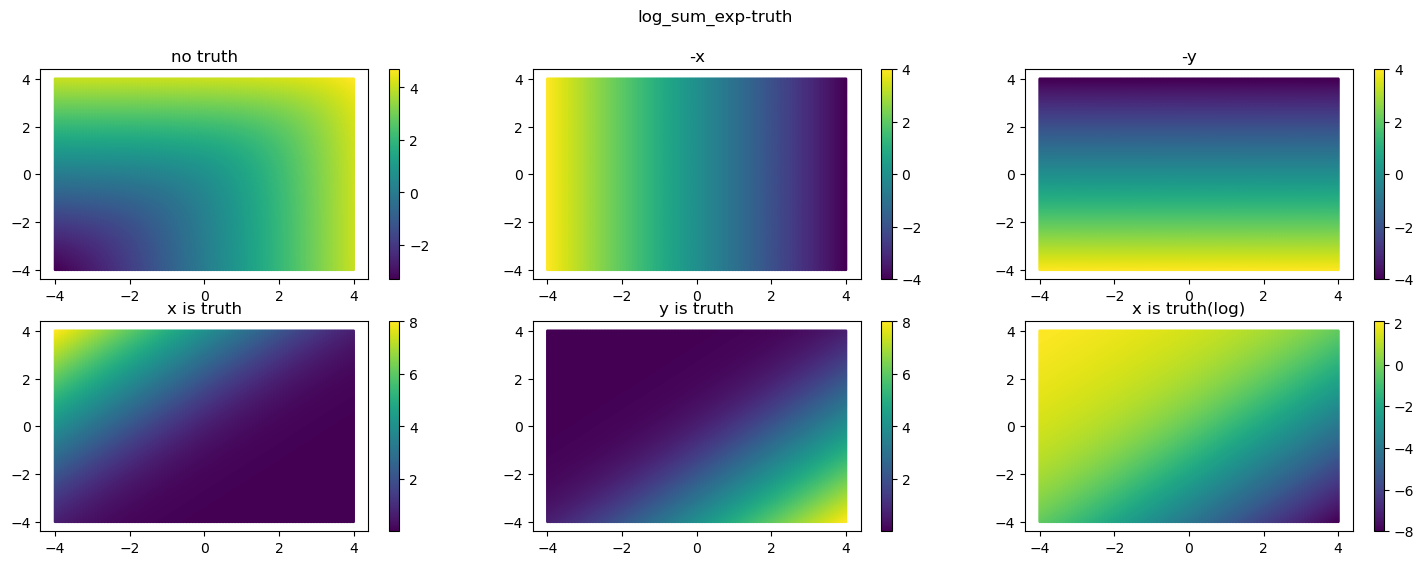

In [32]:
x = torch.linspace(-4,4,201)
y = torch.linspace(-4,4,201)
x,y = torch.meshgrid(x,y)
x,y = x.reshape(-1,1),y.reshape(-1,1)
concat = torch.hstack([x,y])
print(concat.shape)
x_max = concat.max()
loss1 = torch.log(torch.sum(torch.exp(concat-x_max), 1, keepdim=True)) + x_max - x
loss2 = torch.log(torch.sum(torch.exp(concat-x_max), 1, keepdim=True)) + x_max - y
loss3 = torch.log(torch.sum(torch.exp(concat-x_max), 1, keepdim=True)) + x_max
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(18,6))
fig1 = ax4.scatter(x,y,c=loss1,s=1)
fig2 = ax5.scatter(x,y,c=loss2,s=1)
fig3 = ax1.scatter(x,y,c=loss3,s=1)
fig4 = ax2.scatter(x,y,c=-x,s=1)
fig5 = ax3.scatter(x,y,c=-y,s=1)
fig.colorbar(fig1)
fig.colorbar(fig2)
fig.colorbar(fig3)
fig.colorbar(fig4)
fig.colorbar(fig5)
ax4.set_title('x is truth')
ax5.set_title('y is truth')
ax1.set_title('no truth')
ax2.set_title('-x')
ax3.set_title('-y')
fig6 = ax6.scatter(x,y,c=torch.log(loss1),s=1)
ax6.set_title('x is truth(log)')
fig.colorbar(fig6)
fig.suptitle('log_sum_exp-truth')

> 这里的loss设计也非常巧妙，鼓励truth的一方尽可能高而另一方尽可能低，等高线为两方得分同时加

smooth l1

Text(0.5, 1.0, 'smooth_l1 loss')

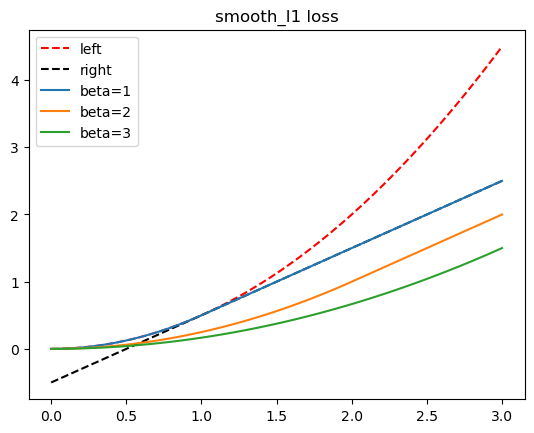

In [44]:
diff = np.linspace(0,3,101)
def smooth_l1(diff,beta):
    result = np.zeros_like(diff)
    result[diff<beta] = 0.5*diff[diff<beta]**2/beta
    result[diff>=beta] = diff[diff>=beta]-0.5*beta
    return result
fig,ax = plt.subplots(1,1)
ax.plot(diff,0.5*diff**2,'r--',label='left')
ax.plot(diff,diff-0.5,'k--',label='right')
ax.plot(diff,smooth_l1(diff,1),label='beta=1')
ax.plot(diff,smooth_l1(diff,2),label='beta=2')
ax.plot(diff,smooth_l1(diff,3),label='beta=3')
ax.legend()
ax.set_title('smooth_l1 loss')

## hard negative mining

In [79]:
# Hard Negative Mining
loss_c[pos.view(-1,1)] = 0  # filter out pos boxes for now
loss_c = loss_c.view(num, -1)  # batch, num_priors
_, loss_idx = loss_c.sort(1, descending=True)   # 一次排序的idx得到原张量从大到小排序每个值对应的序列号
_, idx_rank = loss_idx.sort(1)                  # 二次排序的idx得到原张量每个值从大到小的排名

In [56]:
num_pos = pos.long().sum(1, keepdim=True)
num_neg = torch.clamp(argsloss.negpos_ratio*num_pos, max=pos.size(1)-1)
neg = idx_rank < num_neg.expand_as(idx_rank)  # 这一步也可以通过对loss_idx索引前num_neg条实现
# print(num_pos.size(), num_neg.size(), neg.size())
num_pos, num_neg,loss_c[neg].min(),loss_c.sort(1,descending=True).values[:,num_neg-1], pos.shape

(tensor([[351]]),
 tensor([[1053]]),
 tensor(0.1817, grad_fn=<MinBackward1>),
 tensor([[[0.1817]]], grad_fn=<IndexBackward0>),
 torch.Size([1, 5440]))

## 损失计算

> 损失计算流程：正框的位置损失+正框的类别损失+（以类别损失排序最大序列的）负框的类别损失

In [74]:
# Confidence Loss Including Positive and Negative Examples
pos_idx = pos.unsqueeze(2).expand_as(conf_data)
neg_idx = neg.unsqueeze(2).expand_as(conf_data)
conf_prediction = conf_data[(pos_idx+neg_idx).gt(0)].view(-1, argsloss.num_classes)
targets_weighted = conf_t[(pos+neg).gt(0)]
# print(pos_idx.size(), neg_idx.size(), conf_p.size(), targets_weighted.size())


loss_c = F.cross_entropy(conf_prediction, targets_weighted, reduction='sum')
# Sum of losses: L(x,c,l,g) = (Lconf(x, c) + αLloc(x,l,g)) / N
N = num_pos.data.sum().float()
# N = max(num_pos.data.sum().float(), 1)
loss_lf = loss_l/N
loss_cf = loss_c/N/(1+argsloss.negpos_ratio)
N, loss_l, loss_c, loss_lf, loss_cf

NameError: name 'loss_l' is not defined

In [60]:
num_pos.data.sum().float(), pos.sum(), neg.sum(), (pos+neg).sum()

(tensor(351.), tensor(351), tensor(1053), tensor(1404))

In [86]:
loss_c[neg].sum()

tensor(321.7872, grad_fn=<SumBackward0>)

In [80]:
loss_c.shape,pos.shape

(torch.Size([1, 5440]), torch.Size([1, 5440]))

## 检查

In [123]:
loss_selection = (pos+neg).gt(0)
print(loss_selection.sum(),overlapindex.sum())
loss_selection =  loss_selection & overlapindex.expand_as(loss_selection)
loss_selection.sum()

tensor(1404) tensor(1534)


tensor(642)

In [127]:
loss_selection_idx = loss_selection.unsqueeze(2).expand_as(conf_data)
conf_predictioned = conf_data[loss_selection_idx].view(-1,2)
targets_weighteded = conf_t[loss_selection]
loss_ced = F.cross_entropy(conf_predictioned,targets_weighteded,reduction='sum')
loss_ced

tensor(677.6577, grad_fn=<NllLossBackward0>)

In [129]:
conf_data[loss_selection_idx].view(-1,2)

tensor([[ 1.4795, -0.1559],
        [ 1.4743, -0.1609],
        [ 1.4739, -0.1615],
        ...,
        [ 0.7542, -1.0889],
        [ 0.7090, -0.8873],
        [ 0.8246, -1.0734]], grad_fn=<ViewBackward0>)

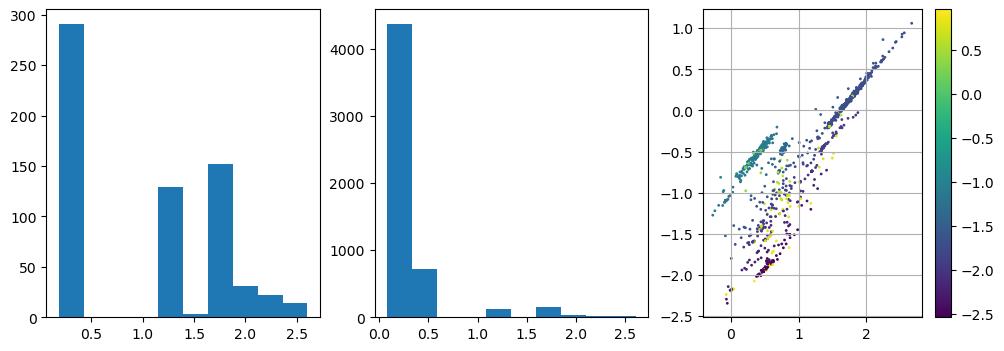

In [143]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,4))
ax1.hist(loss_c[loss_selection.T].detach())
ax2.hist(loss_c.squeeze().detach())
fig3 = ax3.scatter(batch_conf[:,0].detach(),batch_conf[:,1].detach(),s=1,c=torch.log(loss_c.squeeze()).detach())
ax3.grid()
fig.colorbar(fig3)

### 检查有重叠和无重叠的conf分数

> 注：这里的loss_c是log_sum_exp的loss_c，不是后续交叉熵损失。

Text(0.5, 1.0, 'total conf')

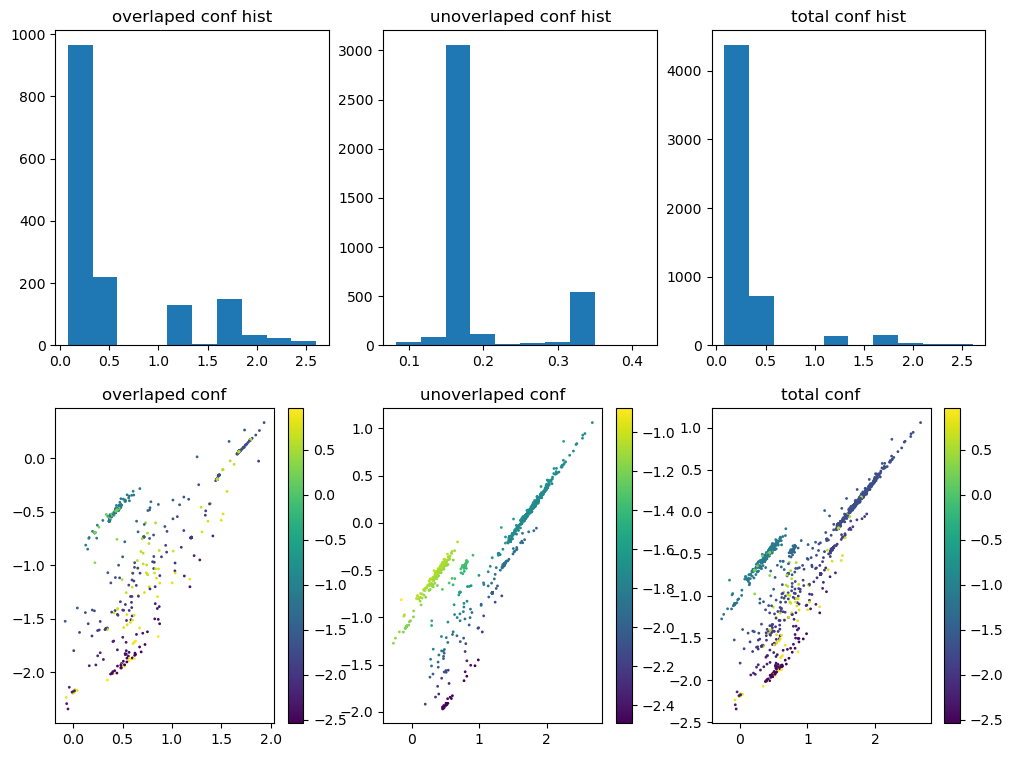

In [163]:
loss_c_overlaped = loss_c[overlapindex]
loss_c_unoverlaped = loss_c[overlapindex.lt(1)]
fig, ((ax1,ax2,ax6),(ax3,ax4,ax5)) = plt.subplots(2,3,figsize=(12, 9))
ax1.hist(loss_c_overlaped.squeeze().detach())
ax2.hist(loss_c_unoverlaped.squeeze().detach())
ax6.hist(loss_c.squeeze().detach())
ax1.set_title('overlaped conf hist')
ax2.set_title('unoverlaped conf hist')
ax6.set_title('total conf hist')
fig3 = ax3.scatter(batch_conf[overlapindex,0].detach(),batch_conf[overlapindex,1].detach(),s=1,c=torch.log(loss_c_overlaped.detach()))
fig4 = ax4.scatter(batch_conf[overlapindex.lt(1),0].detach(),batch_conf[overlapindex.lt(1),1].detach(),s=1,c=torch.log(loss_c_unoverlaped.squeeze()).detach())
fig5 = ax5.scatter(batch_conf[:,0].detach(),batch_conf[:,1].detach(),s=1,c=torch.log(loss_c.squeeze()).detach())
fig.colorbar(fig3)
fig.colorbar(fig4)
fig.colorbar(fig5)
ax3.set_title('overlaped conf')
ax4.set_title('unoverlaped conf')
ax5.set_title('total conf')


Text(0.5, 1.0, 'total conf')

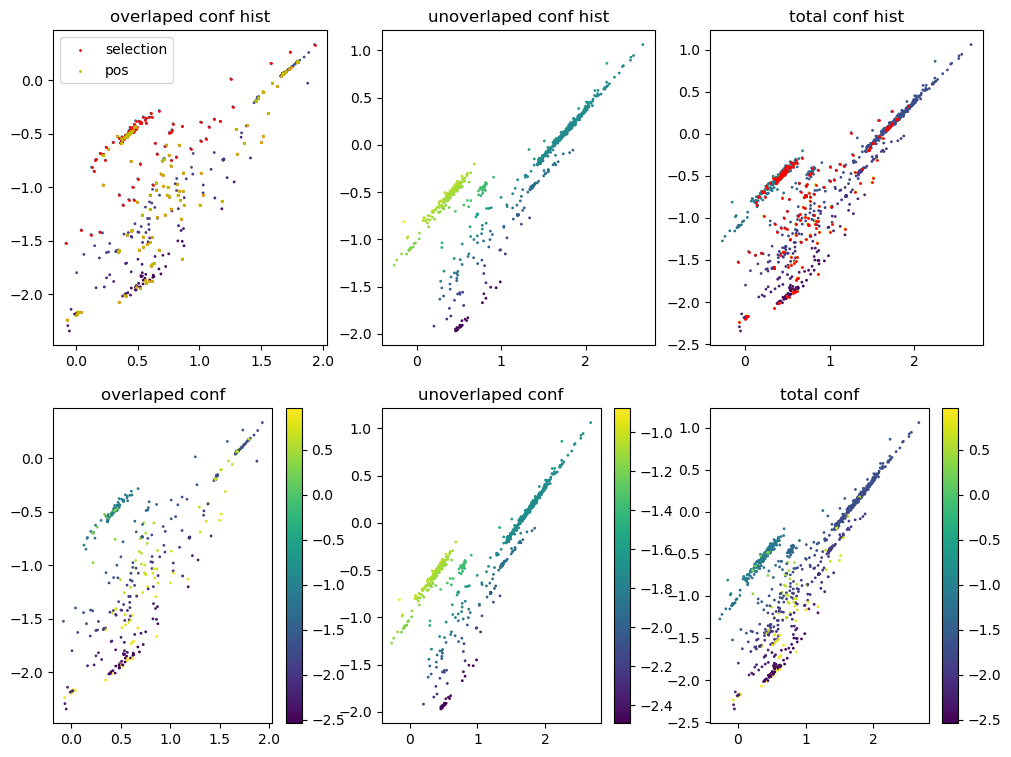

In [176]:
loss_c_overlaped = loss_c[overlapindex]
loss_c_unoverlaped = loss_c[overlapindex.lt(1)]
fig, ((ax1,ax2,ax6),(ax3,ax4,ax5)) = plt.subplots(2,3,figsize=(12, 9))
ax1.scatter(batch_conf[overlapindex,0].detach(),batch_conf[overlapindex,1].detach(),s=1,c=torch.log(loss_c_overlaped.detach()))
ax1.scatter(batch_conf[overlapindex&loss_selection.squeeze(),0].detach(),batch_conf[overlapindex&loss_selection.squeeze(),1].detach(),s=1,c='r',label='selection')
ax1.scatter(batch_conf[overlapindex&pos.squeeze(),0].detach(),batch_conf[overlapindex&pos.squeeze(),1].detach(),s=1,c='y',label='pos')
ax1.legend()
ax2.scatter(batch_conf[overlapindex.lt(1),0].detach(),batch_conf[overlapindex.lt(1),1].detach(),s=1,c=torch.log(loss_c_unoverlaped.squeeze()).detach())
ax2.scatter(batch_conf[overlapindex.lt(1)&loss_selection.squeeze(),0].detach(),batch_conf[overlapindex.lt(1)&loss_selection.squeeze(),1].detach(),s=1,c='r')
ax6.scatter(batch_conf[:,0].detach(),batch_conf[:,1].detach(),s=1,c=torch.log(loss_c.squeeze()).detach())
ax6.scatter(batch_conf[loss_selection.squeeze(),0].detach(),batch_conf[loss_selection.squeeze(),1].detach(),s=1,c='r')
ax1.set_title('overlaped conf hist')
ax2.set_title('unoverlaped conf hist')
ax6.set_title('total conf hist')
fig3 = ax3.scatter(batch_conf[overlapindex,0].detach(),batch_conf[overlapindex,1].detach(),s=1,c=torch.log(loss_c_overlaped.detach()))
fig4 = ax4.scatter(batch_conf[overlapindex.lt(1),0].detach(),batch_conf[overlapindex.lt(1),1].detach(),s=1,c=torch.log(loss_c_unoverlaped.squeeze()).detach())
fig5 = ax5.scatter(batch_conf[:,0].detach(),batch_conf[:,1].detach(),s=1,c=torch.log(loss_c.squeeze()).detach())
fig.colorbar(fig3)
fig.colorbar(fig4)
fig.colorbar(fig5)
ax3.set_title('overlaped conf')
ax4.set_title('unoverlaped conf')
ax5.set_title('total conf')
fig.savefig('check/pngs/loss_c-overlap_selection_pos.png')

> 震惊，hard negative mining选取的样本居然全都是overlapped的样本

In [179]:
loss_c[pos.squeeze()].sum(), loss_c[neg.squeeze()].sum()

(tensor(585.8681, grad_fn=<SumBackward0>),
 tensor(321.7872, grad_fn=<SumBackward0>))

# 匹配损失检测一体化

In [ ]:
from models.refinedet import build_refinedet
from layers.box_utils import *
from layers.modules import RefineDetMultiBoxLoss
from data import cargs
from data import HOME
from data import cf_refinedet as cfg
import numpy as np
import torch
import os
import torch.nn.functional as F
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# init definition
pathes = {
    'weight': '/data/_hyz/RefineDet/weights/cf_refinedet_20230510t/RefineDet128_dscf_s_v0_eph157_itr15000.final.pth',
    'dataroot': '/data/_hyz/RefineDet/dataset/cf_s_v0/',
}

fileid_list = list()
for i in os.listdir(pathes['dataroot']+'anno'):
    if i.endswith('fits'):
        fileid_list.append(i[:-5].split('anno_')[1])
date_stamp = pathes['weight'].split('cf_refinedet_')[1].split('/RefineDet128_ds')[0]
eph_stamp = pathes['weight'].split('eph')[1].split('_itr')[0]

class Args_loss(object):
    def __init__(self):
        self.use_gpu = False
        self.num_classes = 2
        self.threshold = 0.1
        self.background_label = 0
        self.do_neg_mining = True
        self.negpos_ratio = 3
        self.variance = cfg['128']['variance']
        self.conf_thld = 2
        self.is_ODM = False
        
argsloss = Args_loss()

# net loading
net = build_refinedet('train',128,cfg['128']['num_classes'])
net.load_weights(pathes['weight'])

# data loading
# for idx in fileid_list:
print('='*10+'data loading'+'='*10)
testid = fileid_list[0]
print('testid: ',testid)
img = np.load(pathes['dataroot']+'/image/img_'+testid+'.npy').astype(np.float32)
img = torch.tensor(img).repeat(1,3,1,1)
targets = np.load(pathes['dataroot']+'/catalog/cat_'+testid+'.npy').astype(np.float16)
targets = torch.tensor(targets).repeat(1,1,1)
print('truth: ', targets.size(1))

# forecasting
out = net(img)
arm_loc_data, arm_conf_data, odm_loc_data, odm_conf_data, priors = out

# data selection
if argsloss.is_ODM:
    loc_data, conf_data = odm_loc_data, odm_conf_data
else:
    loc_data, conf_data = arm_loc_data, arm_conf_data

num = loc_data.size(0)  # batch
priors = priors[:loc_data.size(1), :]  # choose prior boxes in num of prediction boxes
num_priors = (priors.size(0))  # in fact this is prior boxes after choose
num_classes = argsloss.num_classes
print('batchsize, loc_data, conf_data, priors', num, loc_data.shape, conf_data.shape, priors.shape)

# before match
# match priors (default boxes) and ground truth boxes
loc_t = torch.Tensor(num, num_priors, 4)
conf_t = torch.LongTensor(num, num_priors)
truths_loc = targets[0][:, :-1].data
truths_labels = targets[0][:, -1].data
truths_labels

if not argsloss.is_ODM:
    truths_labels = truths_labels >= 0
    defaults = priors.data
    overlaps = jaccard(truths_loc, point_form(priors))

fig, ax = plt.subplots(figsize=(20,10))
plt.imshow(overlaps,origin='lower',aspect=100,cmap='ocean_r')
# ax.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(1))
plt.grid(which='both',axis='y')
plt.colorbar()
overlaps

overlapindex = overlaps.gt(0).sum(dim=0).gt(0)
overlaped = overlaps[:,overlapindex]
prior_overlaped = prior[overlapindex,:]
plt.imshow(overlaped,cmap='ocean_r',aspect=10)

with open(pathes['dataroot']+'/anno/overlaped_priors_%s.reg'%testid,'w') as p:
    p.write('global color=#FF0064 dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \nphysical \n')
    for i,_i in enumerate(prior[overlaps.gt(0).sum(dim=0).gt(0),:]):
        p.write(f'circle({_i[0].item()},{_i[1].item()},{_i[2].item()/2}) \n')
        
# (Bipartite Matching)
# [1,num_objects] best prior for each ground truth
best_prior_overlap, best_prior_idx = overlaps.max(1, keepdim=True)
# [1,num_priors] best ground truth for each prior
best_truth_overlap, best_truth_idx = overlaps.max(0, keepdim=True)
best_truth_idx.squeeze_(0)
best_truth_overlap.squeeze_(0)
best_prior_idx.squeeze_(1)
best_prior_overlap.squeeze_(1)
# best_truth_overlap.index_fill_(0, best_prior_idx, 2)  # ensure best prior
# TODO refactor: index  best_prior_idx with long tensor
# ensure every gt matches with its prior of max overlap
# 以下三行实现功能：先对每个truth匹配最佳prior，再对剩余的prior匹配最佳truth
for j in range(best_prior_idx.size(0)):
    best_truth_idx[best_prior_idx[j]] = j
matches = truths_loc[best_truth_idx]          # Shape: [num_priors,4]

plt.hist((matches[:,2]+matches[:,0])/2,bins=100)
plt.title('matches hist in x')
plt.scatter(prior[:,0]-(matches[:,2]+matches[:,0])/2, prior[:,1]-(matches[:,3]+matches[:,1])/2, s=1)
plt.title('x,y differ between prior and matches_truth')

# (Bipartite Matching)
# [1,num_objects] best prior for each ground truth
best_prior_overlaped, best_prior_idxed = overlaped.max(1, keepdim=True)
# [1,num_priors] best ground truth for each prior
best_truth_overlaped, best_truth_idxed = overlaped.max(0, keepdim=True)
best_prior_overlaped.T, best_truth_overlaped

# 调整为一维张量
best_truth_idxed.squeeze_(0)
best_truth_overlaped.squeeze_(0)
best_prior_idxed.squeeze_(1)
best_prior_overlaped.squeeze_(1)
best_truth_overlaped

best_truth_overlaped.index_fill_(0, best_prior_idxed, 2)  # ensure best prior

# TODO refactor: index  best_prior_idx with long tensor
# ensure every gt matches with its prior of max overlap
# 以下三行实现功能：先对每个truth匹配最佳prior，再对剩余的prior匹配最佳truth
for j in range(best_prior_idxed.size(0)):
    best_truth_idxed[best_prior_idxed[j]] = j
matches_overlaped = truths_loc[best_truth_idxed]          # Shape: [num_priors,4]
matches_overlaped, best_truth_idxed.shape

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.hist((matches_overlaped[:,2]+matches_overlaped[:,0])/2,bins=100)
ax1.text(0,1,'xx')
# ax1.title('matches hist in x')
ax2.scatter(prior_overlaped[:,0]-(matches_overlaped[:,2]+matches_overlaped[:,0])/2, prior_overlaped[:,1]-(matches_overlaped[:,3]+matches_overlaped[:,1])/2, s=1)
# ax2.title('x,y differ between prior and matches_truth')

# encode and write in
mkind = truths_labels[best_truth_idx]         # Shape: [num_priors]  这是先基于面积匹配得到了框，然后直接将与匹配度最高的真值框的种类赋予。
loc = encode(matches, priors, cfg['128']['variance'])
mkind[best_truth_overlap < argsloss.threshold] = 0  # label as background
loc_t[0] = loc    # [num_priors,4] encoded offsets to learn
conf_t[0] = mkind  # [num_priors] top class label for each prior
print(loc.max(0), loc.min(0), torch.abs(loc).min(0))
loc, mkind, mkind.shape, mkind.sum()

# encode and write in
mkinded = truths_labels[best_truth_idxed]         # Shape: [num_priors]  这是先基于面积匹配得到了框，然后直接将与匹配度最高的真值框的种类赋予。
loced = encode(matches_overlaped, prior_overlaped, cfg['128']['variance'])
mkinded[best_truth_overlaped < argsloss.threshold] = 0  # label as background
print(loced.max(0), loced.min(0), torch.abs(loced).min(0))
loced, mkinded, mkinded.shape, mkinded.sum()

overlap_over = best_truth_overlap >= argsloss.threshold
plt.scatter(torch.where(overlap_over)[0], best_truth_overlap[overlap_over],s=1)
plt.scatter(best_prior_idx, best_truth_overlap[best_prior_idx],s=1,c='r')

def matched_positive_with_threshold(threshold):
    if len(threshold) == 1:
        mkinded = truths_labels[best_truth_idxed]         # Shape: [num_priors]  这是先基于面积匹配得到了框，然后直接将与匹配度最高的真值框的种类赋予。
        mkinded[best_truth_overlaped < threshold[0]] = 0  # label as background
        result = mkinded.sum()
    elif len(threshold) > 1:
        result = []
        for i in threshold:
            mkinded = truths_labels[best_truth_idxed]         # Shape: [num_priors]  这是先基于面积匹配得到了框，然后直接将与匹配度最高的真值框的种类赋予。
            mkinded[best_truth_overlaped < i] = 0  # label as background
            result.append(mkinded.sum())
    return result

tl = np.linspace(-10,0,101)
tl = 2 ** tl
plt.plot(tl,matched_positive_with_threshold(tl))
plt.title('matched_positive_with_threshold')
matched_positive_with_threshold([0.5])

if argsloss.use_gpu:
    loc_t = loc_t.cuda()
    conf_t = conf_t.cuda()
# wrap targets
loc_t.requires_grad = False
conf_t.requires_grad = False
#print(loc_t.size(), conf_t.size())

# pos definition
if argsloss.is_ODM:
    P = F.softmax(arm_conf_data, 2)
    arm_conf_tmp = P[:,:,1]
    object_score_index = arm_conf_tmp <= argsloss.theta
    pos = conf_t > 0
    pos[object_score_index.data] = 0
else:
    pos = conf_t > 0
#print(pos.size())
#num_pos = pos.sum(dim=1, keepdim=True)
pos, pos.shape, pos.sum()

# Localization Loss (Smooth L1)
# 损失指的是最佳先验匹配和预测框的损失
# Shape: [batch,num_priors,4]
pos_idx = pos.unsqueeze(pos.dim()).expand_as(loc_data)
loc_prediction = loc_data[pos_idx].view(-1, 4)
loc_truth = loc_t[pos_idx].view(-1, 4)
loc_prediction.shape, loc_truth.shape, loc_prediction, loc_truth, loc_truth.max(0)

loss_l = F.smooth_l1_loss(loc_prediction, loc_truth, reduction='sum')
loss_l

# Compute max conf across batch for hard negative mining
# 这里的loss_c是临时的
batch_conf = conf_data.view(-1, argsloss.num_classes)
# print(batch_conf.size,conf_t.size)
loss_c = log_sum_exp(batch_conf) - batch_conf.gather(1, conf_t.view(-1, 1))  # gather(dim, indexes)
loss_c

# Hard Negative Mining
loss_c[pos.view(-1,1)] = 0  # filter out pos boxes for now
loss_c = loss_c.view(num, -1)  # batch, num_priors
_, loss_idx = loss_c.sort(1, descending=True)   # 一次排序的idx得到原张量从大到小排序每个值对应的序列号
_, idx_rank = loss_idx.sort(1)                  # 二次排序的idx得到原张量每个值从大到小的排名

num_pos = pos.long().sum(1, keepdim=True)
num_neg = torch.clamp(argsloss.negpos_ratio*num_pos, max=pos.size(1)-1)
neg = idx_rank < num_neg.expand_as(idx_rank)  # 这一步也可以通过对loss_idx索引前num_neg条实现
# print(num_pos.size(), num_neg.size(), neg.size())
num_neg,loss_c[neg].min(),loss_c.sort(1,descending=True).values[:,num_neg-1]

# Confidence Loss Including Positive and Negative Examples
pos_idx = pos.unsqueeze(2).expand_as(conf_data)
neg_idx = neg.unsqueeze(2).expand_as(conf_data)
conf_prediction = conf_data[(pos_idx+neg_idx).gt(0)].view(-1, argsloss.num_classes)
targets_weighted = conf_t[(pos+neg).gt(0)]
# print(pos_idx.size(), neg_idx.size(), conf_p.size(), targets_weighted.size())


loss_c = F.cross_entropy(conf_prediction, targets_weighted, reduction='sum')
# Sum of losses: L(x,c,l,g) = (Lconf(x, c) + αLloc(x,l,g)) / N
N = num_pos.data.sum().float()
# N = max(num_pos.data.sum().float(), 1)
loss_lf = loss_l/N
loss_cf = loss_c/N/(1+argsloss.negpos_ratio)
N, loss_l, loss_c, loss_lf, loss_cf


loss_selection = (pos+neg).gt(0)
print(loss_selection.sum(),overlapindex.sum())
loss_selection =  loss_selection & overlapindex.expand_as(loss_selection)
loss_selection.sum()

loss_selection_idx = loss_selection.unsqueeze(2).expand_as(conf_data)
conf_predictioned = conf_data[loss_selection_idx].view(-1,2)
targets_weighteded = conf_t[loss_selection]
loss_ced = F.cross_entropy(conf_predictioned,targets_weighteded,reduction='sum')
loss_ced

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,4))
ax1.hist(loss_c[loss_selection.T].detach())
ax2.hist(loss_c.squeeze().detach())
fig3 = ax3.scatter(batch_conf[:,0].detach(),batch_conf[:,1].detach(),s=1,c=torch.log(loss_c.squeeze()).detach())
ax3.grid()
fig.colorbar(fig3)

loss_c_overlaped = loss_c[overlapindex]
loss_c_unoverlaped = loss_c[overlapindex.lt(1)]
fig, ((ax1,ax2,ax6),(ax3,ax4,ax5)) = plt.subplots(2,3,figsize=(12, 9))
ax1.hist(loss_c_overlaped.squeeze().detach())
ax2.hist(loss_c_unoverlaped.squeeze().detach())
ax6.hist(loss_c.squeeze().detach())
ax1.set_title('overlaped conf hist')
ax2.set_title('unoverlaped conf hist')
ax6.set_title('total conf hist')
fig3 = ax3.scatter(batch_conf[overlapindex,0].detach(),batch_conf[overlapindex,1].detach(),s=1,c=torch.log(loss_c_overlaped.detach()))
fig4 = ax4.scatter(batch_conf[overlapindex.lt(1),0].detach(),batch_conf[overlapindex.lt(1),1].detach(),s=1,c=torch.log(loss_c_unoverlaped.squeeze()).detach())
fig5 = ax5.scatter(batch_conf[:,0].detach(),batch_conf[:,1].detach(),s=1,c=torch.log(loss_c.squeeze()).detach())
fig.colorbar(fig3)
fig.colorbar(fig4)
fig.colorbar(fig5)
ax3.set_title('overlaped conf')
ax4.set_title('unoverlaped conf')
ax5.set_title('total conf')

loss_c_overlaped = loss_c[overlapindex]
loss_c_unoverlaped = loss_c[overlapindex.lt(1)]
fig, ((ax1,ax2,ax6),(ax3,ax4,ax5)) = plt.subplots(2,3,figsize=(12, 9))
ax1.scatter(batch_conf[overlapindex,0].detach(),batch_conf[overlapindex,1].detach(),s=1,c=torch.log(loss_c_overlaped.detach()))
ax1.scatter(batch_conf[overlapindex&loss_selection.squeeze(),0].detach(),batch_conf[overlapindex&loss_selection.squeeze(),1].detach(),s=1,c='r',label='selection')
ax1.scatter(batch_conf[overlapindex&pos.squeeze(),0].detach(),batch_conf[overlapindex&pos.squeeze(),1].detach(),s=1,c='y',label='pos')
ax1.legend()
ax2.scatter(batch_conf[overlapindex.lt(1),0].detach(),batch_conf[overlapindex.lt(1),1].detach(),s=1,c=torch.log(loss_c_unoverlaped.squeeze()).detach())
ax2.scatter(batch_conf[overlapindex.lt(1)&loss_selection.squeeze(),0].detach(),batch_conf[overlapindex.lt(1)&loss_selection.squeeze(),1].detach(),s=1,c='r')
ax6.scatter(batch_conf[:,0].detach(),batch_conf[:,1].detach(),s=1,c=torch.log(loss_c.squeeze()).detach())
ax6.scatter(batch_conf[loss_selection.squeeze(),0].detach(),batch_conf[loss_selection.squeeze(),1].detach(),s=1,c='r')
ax1.set_title('overlaped conf hist')
ax2.set_title('unoverlaped conf hist')
ax6.set_title('total conf hist')
fig3 = ax3.scatter(batch_conf[overlapindex,0].detach(),batch_conf[overlapindex,1].detach(),s=1,c=torch.log(loss_c_overlaped.detach()))
fig4 = ax4.scatter(batch_conf[overlapindex.lt(1),0].detach(),batch_conf[overlapindex.lt(1),1].detach(),s=1,c=torch.log(loss_c_unoverlaped.squeeze()).detach())
fig5 = ax5.scatter(batch_conf[:,0].detach(),batch_conf[:,1].detach(),s=1,c=torch.log(loss_c.squeeze()).detach())
fig.colorbar(fig3)
fig.colorbar(fig4)
fig.colorbar(fig5)
ax3.set_title('overlaped conf')
ax4.set_title('unoverlaped conf')
ax5.set_title('total conf')
fig.savefig('check/pngs/loss_c-overlap_selection_pos.png')

loss_c[pos.squeeze()].sum(), loss_c[neg.squeeze()].sum()

# test_ evaluation

## test_cf

In [3]:
from data import *
from data import cf_refinedet as cfg
from data import evalargs as eargs
from layers.box_utils import jaccard
from models.refinedet import build_refinedet
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from matplotlib import patches as patches
from matplotlib.collections import PatchCollection


# init definition
pathes = {
    'weight': './weights/cf_refinedet_20230619p/RefineDet128_dscf_s_v0_eph263_itr25000.final.pth',
    'dataroot': '',
    'checkroot': ''
}

# reload for net
cfg['128']['arm_extra'] = [3,3]
cfg['128']['out_layers'] = [1,2,3,4]
cfg['128']['feature_maps'] = [64,32,16,8]
cfg['128']['steps'] = [2,4,8,16]
cfg['128']['feeling_field'] = [6,16,40,96]
cfg['128']['min_sizes'] = [3,10,26,34]

# data loading
date_stamp = pathes['weight'].split('cf_refinedet_')[1].split('/RefineDet128_ds')[0]
eph_stamp = pathes['weight'].split('eph')[1].split('_itr')[0]
dataset_stamp = pathes['weight'].split('_ds')[1].split('_eph')[0]
pathes['dataroot'] = './dataset/' + dataset_stamp + '/'
pathes['checkroot'] = './eval/' + dataset_stamp + '_' +eph_stamp + '/'
fileid_list = list()
for i in os.listdir(pathes['dataroot']+'anno'):
    if i.endswith('fits'):
        fileid_list.append(i[:-5].split('anno_')[1])


# net load
net = build_refinedet('test',128, cfg['128']['num_classes'],cfg, eargs)
net.load_weights(pathes['weight'])

{'128': {'num_classes': 2, 'min_dim': 128, 'lr_steps': (0.5, 0.7, 0.9), 'max_iter': 150000, 'if_arm_extra': True, 'arm_extra': [3, 3], 'out_layers': [1, 2, 3, 4], 'layers_norm': [True, True, True, True], 'feature_maps': [64, 32, 16, 8], 'steps': [2, 4, 8, 16], 'feeling_field': [6, 16, 40, 96], 'min_sizes': [3, 10, 26, 34], 'max_sizes': [], 'mbox': [1, 1, 1, 1], 'offset_ratio': 0.2, 'size_offset': False, 'aspect': False, 'star_gal': 100, 'aspect_ratios': [[1], [1], [1], [1]], 'variance': [0.3, 0.5], 'clip': False, 'name': 'RefineDet_cf_128'}}


/home/ubuntu/anaconda3/envs/torch/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1678402411778/work/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Loading weights into state dict...
Finished!


In [4]:
index = 0
testid = fileid_list[0]
# forward
img = np.load(pathes['dataroot']+'/image/img_'+testid+'.npy').astype(np.float32)
img = torch.tensor(img).repeat(1,3,1,1)
target = np.load(pathes['dataroot']+'/catalog/cat_'+testid+'.npy')
truth = torch.tensor(target[:,:-1])  # min-max

truth_cs = torch.cat([(truth[:,2:]+truth[:,:2])/2, truth[:,2:]-truth[:,:2]], dim=1)
out = net(img)  # batch, class, (boxes, score+loc)
boxes = out[0,1,:]  # 0:background 1:star
scores = boxes[:,0]
boxes = boxes[:,1:]
nonzero = int((scores != 0).sum())
boxes = boxes[:nonzero]
scores = scores[:nonzero]
nonzero

/data/_hyz/RefineDet/layers/box_utils.py:273: UserWarning: An output with one or more elements was resized since it had shape [149], which does not match the required output shape [138]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /opt/conda/conda-bld/pytorch_1678402411778/work/aten/src/ATen/native/Resize.cpp:26.)
  torch.index_select(x1, 0, idx, out=xx1)
/data/_hyz/RefineDet/layers/box_utils.py:274: UserWarning: An output with one or more elements was resized since it had shape [149], which does not match the required output shape [138]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /op

22

In [5]:
boxes, scores.size()

(tensor([[ 82.4620,  79.2979,  86.9097,  83.6141],
         [ 60.6719,  67.6412,  66.3602,  73.1089],
         [  2.8181,  59.8440,   8.8555,  65.8674],
         [116.1962, 107.5668, 121.1900, 112.6150],
         [118.4445,  74.0532, 126.3852,  82.0585],
         [ 30.3830,  82.4912,  37.4290,  89.5470],
         [120.3566,  90.3099, 125.5239,  95.4576],
         [ 85.6603,  65.6454,  90.2777,  70.1241],
         [102.1156,  21.4525, 117.6180,  36.4854],
         [ 90.1087,  37.1593, 110.5324,  57.6255],
         [ 47.9206,  10.8754,  51.7740,  14.7010],
         [124.8502, 117.6230, 129.6295, 122.3803],
         [  5.9702,  68.5574,  44.2596, 107.1965],
         [ 55.2047,  74.4890,  59.4080,  78.5712],
         [ 95.6528,  94.4750,  98.2269,  97.0620],
         [ 74.4188,  58.9512,  77.4925,  62.0120],
         [ 59.4250,  69.4528,  64.6907,  74.7485],
         [ 96.6392,  21.6151, 119.8962,  43.8396],
         [ -4.5730,  53.7333,  56.1324, 117.1877],
         [ 59.4108, 123.2836,  

In [6]:
if not os.path.exists(pathes['checkroot']):
    os.mkdir(pathes['checkroot'])
    
# 假设是xmin,ymin,xmax,ymax形式
boxes_cs = torch.cat([(boxes[:,2:]+boxes[:,:2])/2,(boxes[:,2:]-boxes[:,:2])], dim=1)
# # reg file generation
# with open(pathes['checkroot']+testid+'.reg','w') as p:
#     p.write('global color=red dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \nphysical \n')
#     for i,_score in enumerate(scores):
#         p.write(f'box({boxes_cs[i,0].item()},{boxes_cs[i,1].item()},{boxes_cs[i,2].item()},{boxes_cs[i,3].item()},0) \t' +\
#                 '# text = {%.2f}\n'%_score.item())
#     p.write('global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1 \nphysical \n')
#     for _t in truth_cs:
#         p.write(f'box({_t[0].item()},{_t[1].item()},{_t[2].item()},{_t[3].item()},0) \t\n')

/tmp/ipykernel_139083/2716176973.py:15: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax_list[index].legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


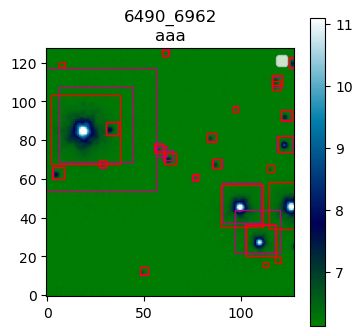

In [7]:
# fig define
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax_list = [ax]

# png file generation
fig_ = ax_list[index].imshow(np.log(img[0][0]),origin='lower',cmap='ocean')
rtas_pre = [patches.Rectangle((xc-w/2,yc-h/2),w,h) for xc,yc,w,h in boxes_cs.detach()]
pc_pre = PatchCollection(rtas_pre,edgecolor='#C20078',facecolor='none',label='prediction')
ax_list[index].add_collection(pc_pre)
rtas_tru = [patches.Rectangle((xmin,ymin),xmax-xmin,ymax-ymin) for xmin,ymin,xmax,ymax in truth.detach()]
pc_tru = PatchCollection(rtas_tru,edgecolor='r',facecolor='none',label='truth')
ax_list[index].add_collection(pc_tru)
ax_list[index].set_title(f'{testid}\naaa')
fig.colorbar(fig_, ax=ax_list[index])
ax_list[index].legend()

# fig.suptitle('evaluation with truth and prediction')
# fig.savefig(pathes['checkroot']+'eval_truth_prediction.png')

## test_eval_cf —— (ap score x) accuracy and precision

In [8]:
eval_overlap_threshold = 0.5

# IoU calculation and threshold and match
overlap = jaccard(boxes,truth)  # [len_boxes, len_truth]
overlap_ebox_max, overlap_ebox_idx = overlap.max(0, keepdim=True)       # box
overlap_etruth_max, overlap_etruth_idx = overlap.max(1, keepdim=True)   # truth
overlap.size()

torch.Size([22, 24])

In [9]:
# accuracy
accu = overlap_ebox_max > eval_overlap_threshold
accu = accu.squeeze()
print(len(accu))
accu = accu.sum()/len(accu)
# precision
prec = overlap_etruth_max > eval_overlap_threshold
prec = prec.squeeze()
prec = prec.sum()/len(prec)
accu,prec

24


(tensor(0.7083), tensor(0.7727))

In [24]:
ax.set_title(f'{testid}\naccu:{accu} prec:{prec}')
fig.show()

# 其他

## mbox

torch.Size([1, 1, 64, 2]) 256


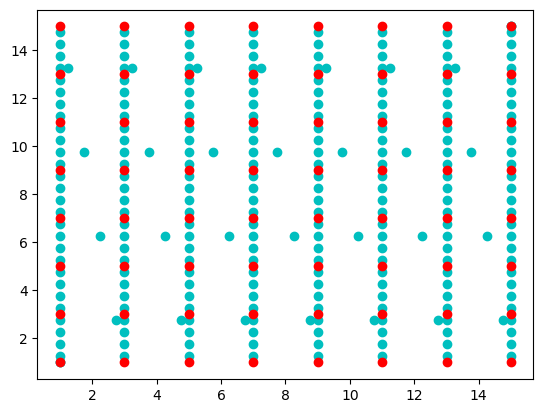

In [23]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

f = 8
# unit center x,y
center_axis = torch.arange(f) + 0.5
center_x, center_y = torch.meshgrid(center_axis,center_axis)
center_grid = torch.vstack((center_x.reshape(-1),center_y.reshape(-1))).T
center_k = center_grid * 2

# size
size_k = torch.ones_like(center_k) * 3

# mbox
num_points = 4 * len(center_k)
center_k = center_k.unsqueeze(0).unsqueeze(0)  # add batch dimension
print(center_k.size(), num_points)
center_kp = F.interpolate(center_k, size=(num_points, 2), mode='bilinear', align_corners=False)
center_kp = center_kp.squeeze(0).squeeze(0)  # remove batch dimension
plt.scatter(center_kp[:,0],center_kp[:,1],c='c')
plt.scatter(center_k[0,0,:,0],center_k[0,0,:,1],c='r')

这插值，好像不太行的样子，弃掉吧

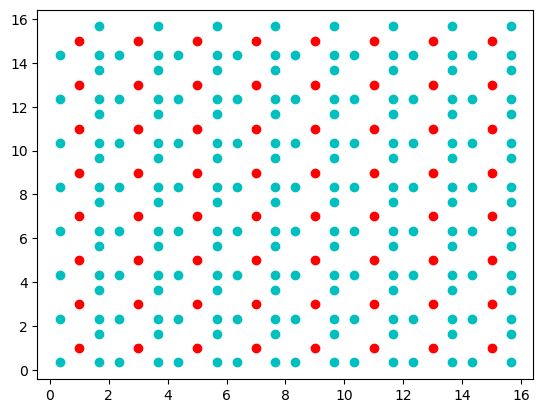

In [36]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

f = 8
# unit center x,y
center_axis = torch.arange(f) + 0.5
center_x, center_y = torch.meshgrid(center_axis,center_axis)
center_grid = torch.vstack((center_x.reshape(-1),center_y.reshape(-1))).T
center_k = center_grid * 1

# size
size_k = torch.ones_like(center_k) * 3

# mbox
mbox = 3
mbox_offset_list = [(1,1),(1,-1),(-1,-1),(-1,1)]
offset_ratio = 0.33
center_kp = torch.empty(0)
for _m in range(mbox):
    center_kpi = center_k + torch.tensor(mbox_offset_list[_m]).expand_as(center_k) * offset_ratio
    center_kp = torch.cat([center_kp,center_kpi],dim=0)
center_k *= 2
center_kp *= 2
plt.scatter(center_kp[:,0],center_kp[:,1],c='c')
plt.scatter(center_k[:,0],center_k[:,1],c='r')

## prior boxes -- size offset

In [60]:
min_sizes = [3,10,26,34]
feeling_field = [6,16,40,96]
size_offset=True
mbox = 9

for k in range(len(min_sizes)):
    size_k = torch.ones(2) * min_sizes[k]
    if size_offset:
        size_min = (0 if k == 0 else feeling_field[k-1]/2)
        size_max = feeling_field[k]
        offset_min = min_sizes[k] - size_min
        offset_max = size_max - min_sizes[k]
        size_offset_ratio = (0.3 if mbox <= 5 else 0.7/(mbox-1)*2)
        offset_l = [[i*(size_offset_ratio)*offset_max for i in torch.arange(mbox)[::2]/2],
                    [i*(-size_offset_ratio)*offset_min for i in (torch.arange(mbox)[1::2]+1)/2]]
        if len(offset_l[0]) != len(offset_l[1]):
            offset_l[1].append(0)
        offset_l = torch.tensor(offset_l).T.reshape(-1)
        
        size_kp = torch.empty(0)
        for i in offset_l[:mbox]:
            size_kp = torch.cat([size_kp, size_k+i])
        print(size_kp)

tensor([3.0000, 3.0000, 2.4750, 2.4750, 3.5250, 3.5250, 1.9500, 1.9500, 4.0500,
        4.0500, 1.4250, 1.4250, 4.5750, 4.5750, 0.9000, 0.9000, 5.1000, 5.1000])
tensor([10.0000, 10.0000,  8.7750,  8.7750, 11.0500, 11.0500,  7.5500,  7.5500,
        12.1000, 12.1000,  6.3250,  6.3250, 13.1500, 13.1500,  5.1000,  5.1000,
        14.2000, 14.2000])
tensor([26.0000, 26.0000, 22.8500, 22.8500, 28.4500, 28.4500, 19.7000, 19.7000,
        30.9000, 30.9000, 16.5500, 16.5500, 33.3500, 33.3500, 13.4000, 13.4000,
        35.8000, 35.8000])
tensor([34.0000, 34.0000, 31.5500, 31.5500, 44.8500, 44.8500, 29.1000, 29.1000,
        55.7000, 55.7000, 26.6500, 26.6500, 66.5500, 66.5500, 24.2000, 24.2000,
        77.4000, 77.4000])


tensor([ 0.0000, -2.4500, 10.8500, -4.9000, 21.7000, -7.3500, 32.5500, -9.8000,
        43.4000,  0.0000])

## box绘图

In [7]:
import matplotlib.pyplot as plt
import numpy as np


with open('./dataset/cf_s_v0/anno/anno_590_3068.reg','r') as r:
    boxes = r.readlines()

temp = []
for line in boxes:
    if line.startswith('box'):
        line = line.split('(')[1].split(')')[0]
        temp.append([float(i) for i in line.split(',')])
boxes = np.array(temp)
boxes[:2]

array([[110.94      ,  62.213     ,   2.29134893,   2.29134893,
          0.        ],
       [ 80.805     ,   0.76      ,   2.77643418,   2.77643418,
          0.        ]])

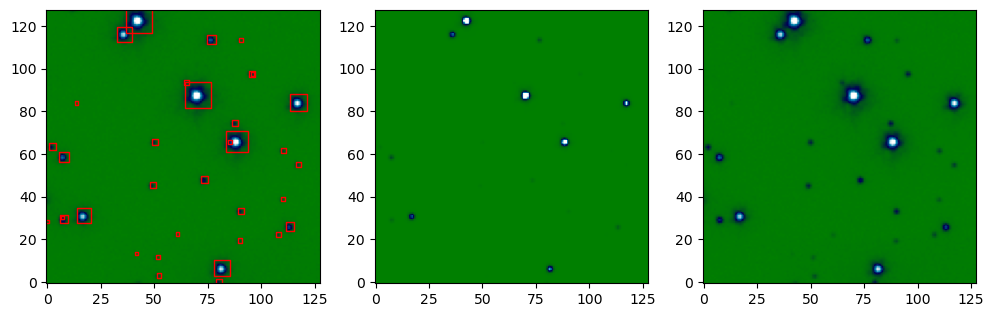

In [41]:
from matplotlib import patches as patches
from matplotlib.collections import PatchCollection

img = np.load('./dataset/cf_s_v0/image/img_590_3068.npy')

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,6))
ax1.imshow(np.log(img),origin='lower',cmap='ocean')
rtas = [patches.Rectangle((xc-w/2,yc-h/2),w,h) for xc,yc,w,h,l in boxes]
pc = PatchCollection(rtas,edgecolor='r',facecolor='none')
ax1.add_collection(pc)
ax2.imshow(img,origin='lower',cmap='ocean')
ax3.imshow(img**0.01,origin='lower',cmap='ocean')

In [1]:
import numpy as np
cat = np.load('./dataset/cf_s_v0/catalog/cat_590_3068.npy')
cat

array([[ 1.08648651e+02,  5.99216511e+01,  1.13231349e+02,
         6.45043489e+01,  1.00000000e+00],
       [ 7.80285658e+01, -2.01643418e+00,  8.35814342e+01,
         3.53643418e+00,  1.00000000e+00],
       [ 8.54273414e+01,  7.21503414e+01,  9.11366586e+01,
         7.78596586e+01,  1.00000000e+00],
       [ 7.49362590e+01, -2.95741005e-01,  8.96877410e+01,
         1.44557410e+01,  1.00000000e+00],
       [ 4.70584545e+01,  4.32044545e+01,  5.24215455e+01,
         4.85675455e+01,  1.00000000e+00],
       [ 9.35534439e+01,  9.53854439e+01,  9.90445561e+01,
         1.00876556e+02,  1.00000000e+00],
       [ 8.38660858e+01,  6.40450858e+01,  8.79779142e+01,
         6.81569142e+01,  1.00000000e+00],
       [ 1.06405996e+02,  2.07369957e+01,  1.10938004e+02,
         2.52690043e+01,  1.00000000e+00],
       [ 5.01552155e+01,  1.04932155e+01,  5.39487845e+01,
         1.42867845e+01,  1.00000000e+00],
       [ 1.07454089e+01,  2.46384089e+01,  2.45665911e+01,
         3.84595911e+01

### 杂散

In [8]:
xx = 3
es_ratio = (6 if xx == 'e' else 1/6 if xx == 's' else 1)
es_ratio * 6

6

end